Histograma de frecuencias

Tarea: ver como hacer un histograma de frecuencia relativa y absoluta

In [20]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots

In [2]:
nacimientos = pd.read_csv('https://raw.githubusercontent.com/jphoyos/fup/main/data/bebes.csv')

In [3]:
nacimientos

,Peso al nacer,Días de gestación,Edad materna,Altura materna,Peso materno en el embarazo,Fumadora materna
0,120,284,27,62,100,False
1,113,282,33,64,135,False
2,128,279,28,64,115,True
3,108,282,23,67,125,True
4,136,286,25,62,93,False
...,...,...,...,...,...,...
1169,113,275,27,60,100,False
1170,128,265,24,67,120,False
1171,130,291,30,65,150,True
1172,125,281,21,65,110,False


In [15]:
fumadora_pesonacimiento = nacimientos[["Fumadora materna", "Peso al nacer"]]
fumadora_pesonacimiento

,Fumadora materna,Peso al nacer
0,False,120
1,False,113
2,True,128
3,True,108
4,False,136
...,...,...
1169,False,113
1170,False,128
1171,True,130
1172,False,125


In [11]:
isfumadora_peso = fumadora_pesonacimiento.groupby("Fumadora materna").sum()
isfumadora_peso

,Peso al nacer
Fumadora materna,
False,88006
True,52243


In [ ]:
fumadora_pesonacimiento.groupby('Fumadora materna').size()

Fumadora materna
False    715
True     459
dtype: int64

In [ ]:
fumadora_pesonacimiento.groupby('Fumadora materna').size().reset_index(name='count')

array([<Axes: title={'center': 'False'}>,
       <Axes: title={'center': 'True'}>], dtype=object)

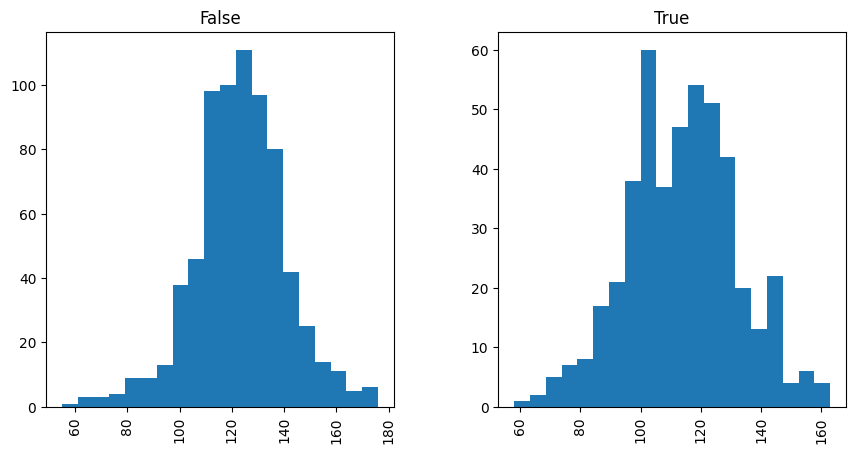

In [ ]:
fumadora_pesonacimiento.hist(column='Peso al nacer', by='Fumadora materna', bins=20, figsize=(10, 5), grid=False)

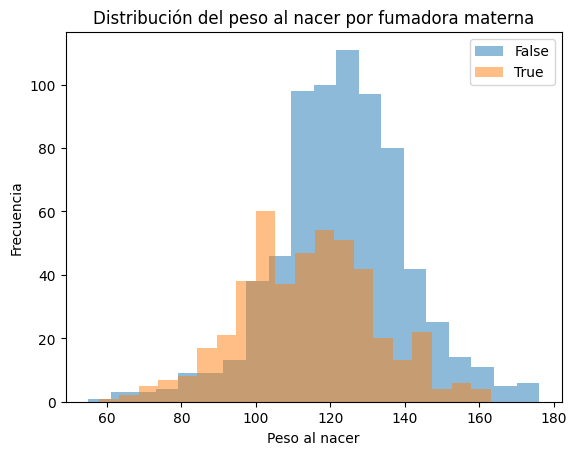

In [ ]:
import matplotlib.pyplot as plt

for grupo, datos in fumadora_pesonacimiento.groupby('Fumadora materna'):
    plt.hist(datos['Peso al nacer'], bins=20, alpha=0.5, label=grupo)
    
plt.xlabel('Peso al nacer')
plt.ylabel('Frecuencia')
plt.title('Distribución del peso al nacer por fumadora materna')
plt.legend()
plt.show()

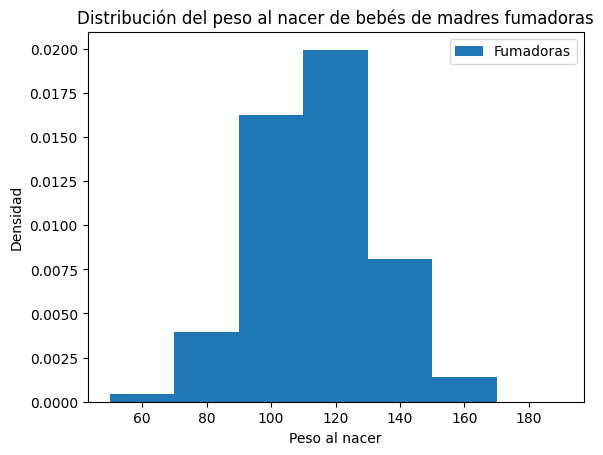

In [35]:
import matplotlib.pyplot as pyplot

datos_fumadoras = fumadora_pesonacimiento[fumadora_pesonacimiento['Fumadora materna'] == True]

ind = np.arange(50, 200, 20)

pyplot.hist(datos_fumadoras['Peso al nacer'], bins=ind, density = True, width=20)

pyplot.legend(['Fumadoras'])
pyplot.xlabel('Peso al nacer')
pyplot.ylabel('Densidad')
pyplot.title('Distribución del peso al nacer de bebés de madres fumadoras')
pyplot.show()

Hipotesis Nula : las distribuciones son iguales
Hipotesis alternativa : las distribuciones seran diferentes

El valor p: el valor p ayuda a diferenciar resultados que son producto del azar del muestreo, de resultados que son estadísticamente significativos. 

In [39]:
fumadora_pesonacimiento['Peso al nacer'].mean()

np.float64(119.46252129471891)

In [45]:
fumadora_pesonacimiento.groupby('Fumadora materna').mean()

,Peso al nacer
Fumadora materna,
False,123.085315
True,113.819172


In [48]:
tabla_promedios = fumadora_pesonacimiento.groupby('Fumadora materna')['Peso al nacer'].mean().reset_index(name='Peso al nacer')
tabla_promedios

,Fumadora materna,Peso al nacer
0,False,123.085315
1,True,113.819172


In [49]:
promedios = tabla_promedios['Peso al nacer'].values
diferencia = promedios[0] - promedios[1]
diferencia

np.float64(9.266142572024918)

Simulacion sobre la hipotesis nula

In [54]:
fumadora_pesonacimiento

,Fumadora materna,Peso al nacer
0,False,120
1,False,113
2,True,128
3,True,108
4,False,136
...,...,...
1169,False,113
1170,False,128
1171,True,130
1172,False,125


In [59]:
fumadora_sorteada = np.random.permutation(fumadora_pesonacimiento['Fumadora materna'].values)
df_sorteado = fumadora_pesonacimiento.copy()
df_sorteado['Etiqueta permutada'] = fumadora_sorteada
df_sorteado

,Fumadora materna,Peso al nacer,Etiqueta permutada
0,False,120,False
1,False,113,False
2,True,128,True
3,True,108,False
4,False,136,False
...,...,...,...
1169,False,113,True
1170,False,128,True
1171,True,130,False
1172,False,125,False


In [60]:
etiquetas_permutadas = fumadora_pesonacimiento['Fumadora materna'].sample(frac=1, replace=False, random_state=None)

original_y_permutada = fumadora_pesonacimiento.copy()
original_y_permutada['Etiqueta permutada'] = etiquetas_permutadas


In [61]:
original_y_permutada

,Fumadora materna,Peso al nacer,Etiqueta permutada
0,False,120,False
1,False,113,False
2,True,128,True
3,True,108,True
4,False,136,False
...,...,...,...
1169,False,113,False
1170,False,128,False
1171,True,130,True
1172,False,125,False
